In [9]:
from utils import retrieve_latest_train_test, run_grid_search_cv, save_results_and_session, load_latest_session
from gscv_configs import gscv_cfg_lr

# This notebook applies LogisticRegression
name = gscv_cfg_lr.name


In [10]:
# load data
train, test = retrieve_latest_train_test()

# run grid search cv
_gscv, pred = run_grid_search_cv(
    gscv_dct=gscv_cfg_lr,
    X_train=train.drop(["Survived"], axis=1),
    y_train=train["Survived"],
    X_test=test.drop(["Survived"], axis=1),
    )

# save results
save_results_and_session(name, _gscv.__dict__)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [11]:
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression()
mdl.fit(train.drop(["Survived"], axis=1), train["Survived"])


LogisticRegression()

In [12]:
import pandas as pd

print(len(mdl.coef_[0]), len(train.drop(["Survived"], axis=1).columns))
var = pd.Series(mdl.coef_[0], index = train.drop(["Survived"], axis=1).columns)

15 15


In [13]:
var[var.abs().sort_values(ascending=False).index]

Title_Mr       -1.878570
Title_Mrs       1.705519
Title_Noble    -1.395307
Title_Master    0.886508
Pclass         -0.736147
Title_Ms        0.686296
Age_true        0.484523
SibSp          -0.477886
Embarked_S     -0.443222
Parch          -0.339224
Embarked_C      0.306666
AgeGroup       -0.250298
Embarked_Q      0.141001
CabinLvl        0.083557
FareGroup       0.050883
dtype: float64

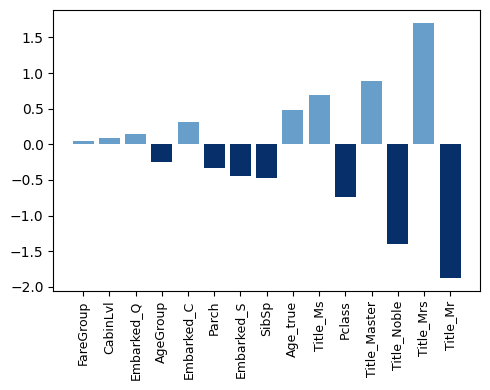

In [25]:
import matplotlib.pyplot as plt
import numpy as np

weights = mdl.coef_[0]
imp_feat_idx = np.argsort(abs(weights))
imp_feat = train.columns[imp_feat_idx]
imp_feat_wz = weights[imp_feat_idx]

fig, ax1 = plt.subplots()
fig.set_size_inches(5, 4, forward=True)
color = ['#07306b' if y<0 else '#689eca' for y in imp_feat_wz]
ax1.bar(imp_feat, imp_feat_wz, color=color)
plt.xticks(fontsize=9, rotation=90)
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=500)

In [ ]:
train["Embarked_C"].head()

445    0
650    0
172    0
450    0
314    0
Name: Embarked_C, dtype: int64